In [35]:
# We will classify the two flowers Setosa and Versicolor using the perceptron model.
# The input features to our model will be the flowers sepal length and petal length.
# This work is based on tutorial here: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html#artificial-neurons-and-the-mcculloch-pitts-model

# load flower dataset
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [36]:
print(df)

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]


In [37]:
import numpy as np
# NumPy is a Python library made for operations on larger arrays and matrices.
# Much of the functionality in NumPy is also available in PyTorch.
# We will learn about NumPy when necessary though it is not the focus of this class.

y = df.iloc[0:100, 4].values # here y is our label, not an input feature
y = np.where(y == 'Iris-setosa', -1, 1)
x = df.iloc[0:100, [0,2]].values

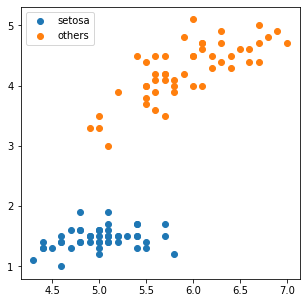

In [38]:
import matplotlib.pyplot as plt
# matplotlib is a Python library that allows us to easily visualize various types of data

plt.figure(figsize=(5, 5))
plt.scatter(x[y == -1][:, 0], x[y == -1][:, 1], label='setosa')
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], label='others')
plt.legend()


In [39]:
# convert our features and labels to PyTorch tensors
import torch

y = torch.tensor(y, dtype=torch.float32).unsqueeze(-1) # (100) -> (100, 1)
x = torch.tensor(x, dtype=torch.float32)
x = x / torch.max(x, dim=0).values.unsqueeze(0) # (100, 2) / (1, 2) 
print(x.shape, torch.max(x, dim=0).values.shape)
# Max scaling: x / max(x)
#   0 <= x <= 1
# Standardization: x mean 0 and standard deviation of 1 unit

torch.Size([100, 2]) torch.Size([2])


In [47]:
num_epochs = 50 # epoch is one iteration over your entire dataset
lr = 1e-2 # lr - learning rate

w = torch.zeros(2, 1)
# shape x: (100, 2), mm(x, w) (100, 2), (2, 1) -> (100, 1)
for i in range(num_epochs):
  # calculate gradient and update weight
  output = torch.mm(x, w)
  error = (y - output)
  # print(f'   x_0: error: {error[0].item():.2f}, ouput: {output[0].item():.2f}, prediction: {torch.where(output[0] > 0.0, 1.0, -1.0).item():.1f}, label: {y[0].item():.1f}') # x_0
  w = w + lr * torch.mm(x.transpose(0, 1), error)

  # calculate loss and accuracy
  loss = torch.sum(error**2)*0.5
  pred = torch.where(output >= 0.0, 1.0, -1.0)
  accuracy = torch.sum(pred == y)/y.shape[0]
  print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.2f}')

Loss: 50.0000, Accuracy: 0.50
Loss: 44.5013, Accuracy: 0.50
Loss: 41.7045, Accuracy: 0.50
Loss: 39.0952, Accuracy: 0.50
Loss: 36.6601, Accuracy: 0.56
Loss: 34.3875, Accuracy: 0.81
Loss: 32.2665, Accuracy: 0.97
Loss: 30.2871, Accuracy: 0.98
Loss: 28.4398, Accuracy: 0.99
Loss: 26.7157, Accuracy: 1.00
Loss: 25.1067, Accuracy: 1.00
Loss: 23.6051, Accuracy: 1.00
Loss: 22.2036, Accuracy: 1.00
Loss: 20.8957, Accuracy: 1.00
Loss: 19.6751, Accuracy: 1.00
Loss: 18.5359, Accuracy: 1.00
Loss: 17.4728, Accuracy: 1.00
Loss: 16.4805, Accuracy: 1.00
Loss: 15.5545, Accuracy: 1.00
Loss: 14.6903, Accuracy: 1.00
Loss: 13.8838, Accuracy: 1.00
Loss: 13.1311, Accuracy: 1.00
Loss: 12.4286, Accuracy: 1.00
Loss: 11.7730, Accuracy: 1.00
Loss: 11.1612, Accuracy: 1.00
Loss: 10.5901, Accuracy: 1.00
Loss: 10.0572, Accuracy: 1.00
Loss: 9.5599, Accuracy: 1.00
Loss: 9.0957, Accuracy: 1.00
Loss: 8.6625, Accuracy: 1.00
Loss: 8.2582, Accuracy: 1.00
Loss: 7.8809, Accuracy: 1.00
Loss: 7.5288, Accuracy: 1.00
Loss: 7.2002, Ac